# Multi-class Classificaion

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

sns.set()


## Load Data

In [58]:
# Load the data
cardio_df = pd.read_csv('CardioGoodFitness.csv')
cardio_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [59]:
#Find the uniqe values in the product column
cardio_df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [60]:
# Check for null values and data types
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [61]:
# Convert the object data type to category
cardio_df['Product'] = cardio_df['Product'].astype('category')
cardio_df['Gender'] = cardio_df['Gender'].astype('category')
cardio_df['MaritalStatus'] = cardio_df['MaritalStatus'].astype('category')
cardio_df['Fitness'] = cardio_df['Fitness'].astype('category')
# fix fitness levels
cardio_df['Fitness'] = cardio_df['Fitness'].cat.reorder_categories([1, 2, 3, 4, 5], ordered=True)
cardio_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


Not very important with such a small data set, but the memory usage has dropped by using categorical values and can also be sorted if needed.

In [62]:
cardio_df.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


## Exploratory Data Analysis

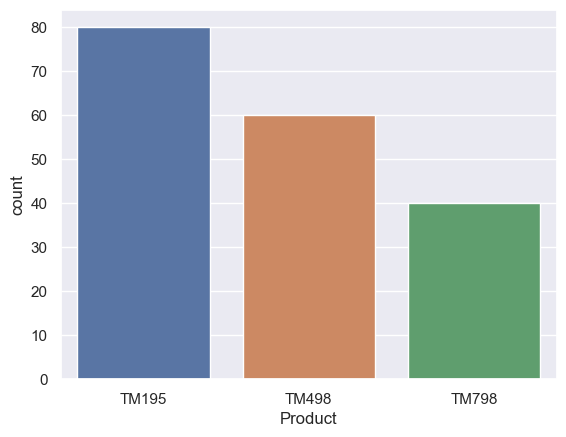

In [63]:
# First, let's look at the distribution of the target variables (Product_TM195, Product_TM498, Product_TM798)
sns.countplot(cardio_df['Product'], label = "Count")
plt.show()


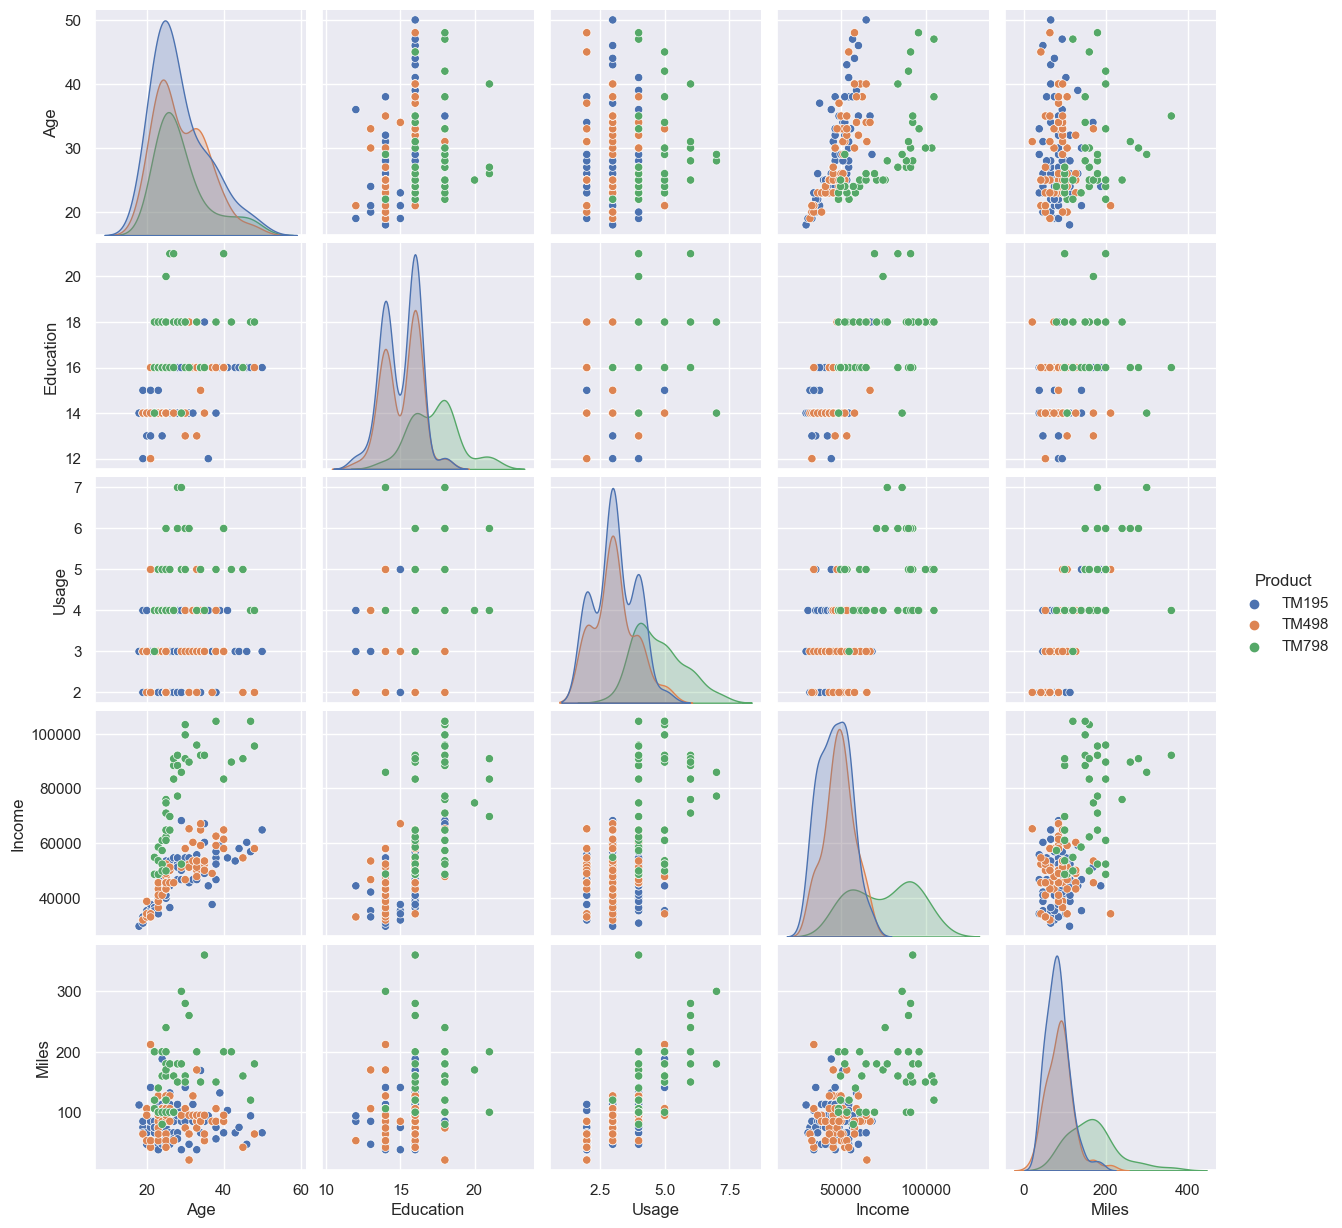

In [64]:
# Now let's look at the relationship between the variables and the target variable
sns.pairplot(cardio_df, hue='Product')
plt.show()


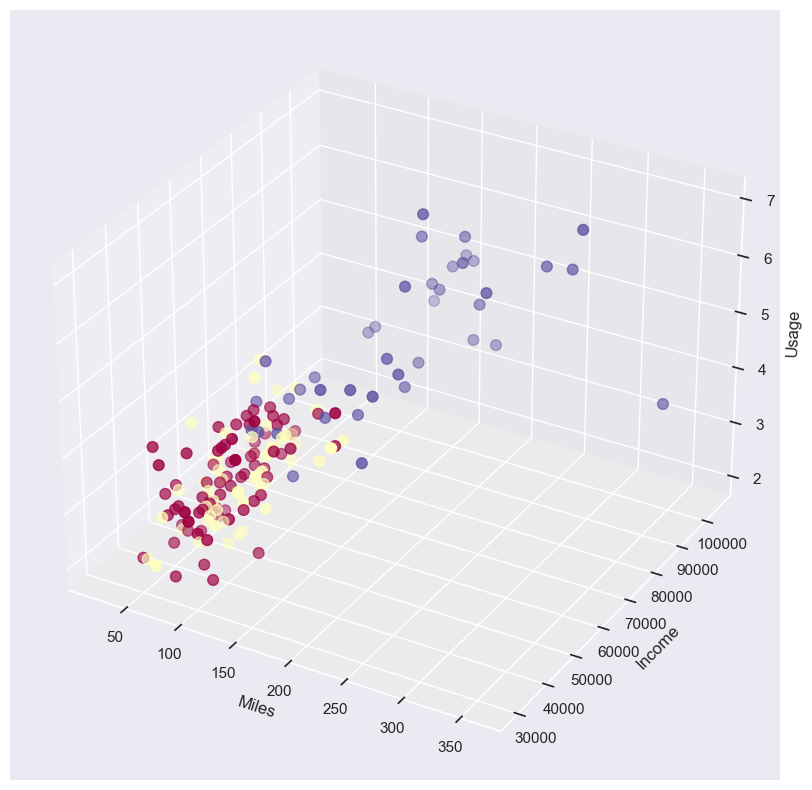

In [65]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

# By tweaking the values of x, y, and z, you can view the data from different angles
axis_list = ['Miles', 'Income', 'Usage']
x, y, z = axis_list

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(cardio_df[x], cardio_df[y], cardio_df[z], c=cardio_df['Product'].cat.codes, s=60, cmap='Spectral')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()


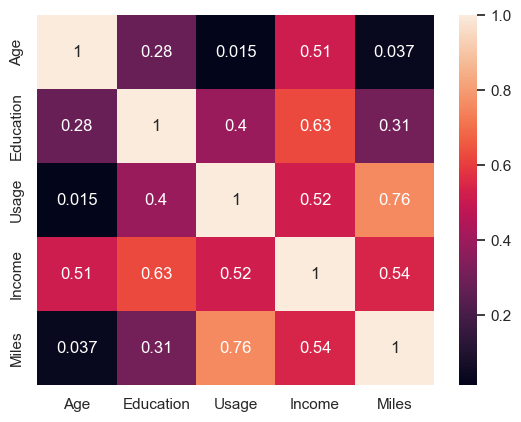

In [66]:
# Now let's look at the correlation between the variables
corr = cardio_df.corr()
sns.heatmap(corr, annot=True)
plt.show()


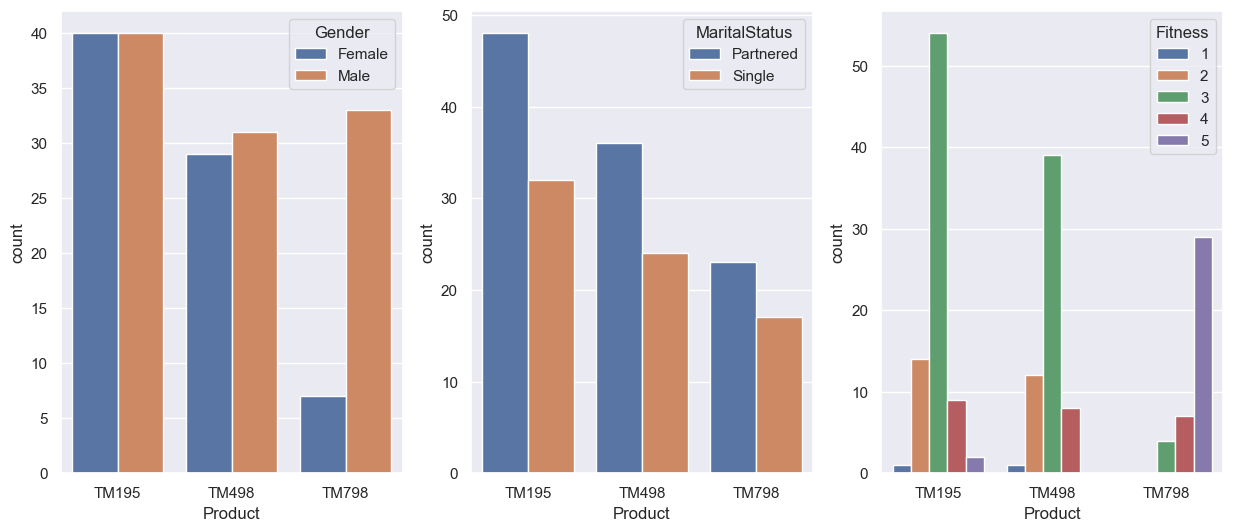

In [68]:
# Now let's look at Gender, MaritalStatus and Fitness by Product

# Create a matplotlib figure object
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Plot the first subplot
sns.countplot(x='Product', hue='Gender', data=cardio_df, ax=axes[0])

# Plot the second subplot
sns.countplot(x='Product', hue='MaritalStatus', data=cardio_df, ax=axes[1])

# Plot the third subplot
sns.countplot(x='Product', hue='Fitness', data=cardio_df, ax=axes[2])

# Show the plot
plt.show()


## Preprocessing

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = cardio_df['Product'] = le.fit_transform(cardio_df['Product'])
target
cardio_df['Gender'] = le.fit_transform(cardio_df['Gender'])
cardio_df['MaritalStatus'] = le.fit_transform(cardio_df['MaritalStatus'])
cardio_df['Fitness'] = le.fit_transform(cardio_df['Fitness'])


In [70]:
cardio_df.drop(['Product'], axis=1, inplace=True)
#Drop categories that are not needed
cardio_df.drop(['Gender','MaritalStatus'], axis=1, inplace=True)
cardio_df.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,3,29562,112
1,19,15,2,2,31836,75
2,19,14,4,2,30699,66
3,19,12,3,2,32973,85
4,20,13,4,1,35247,47


In [71]:
# Scale the data using StandardScaler
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(cardio_df)
scaled_df = pd.DataFrame(scaled_df, columns=cardio_df.columns)
scaled_df.head()


,Age,Education,Usage,Fitness,Income,Miles
0,-1.558146,-0.974987,-0.421117,0.720443,-1.467585,0.170257
1,-1.413725,-0.354854,-1.345520,-0.325362,-1.329438,-0.545143
2,-1.413725,-0.974987,0.503286,-0.325362,-1.398512,-0.719159
3,-1.413725,-2.215254,-0.421117,-0.325362,-1.260365,-0.351792
4,-1.269303,-1.595120,0.503286,-1.371166,-1.122218,-1.086527


In [73]:
# Balance the data so it fits the minority class
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,)
X_res, y_res = rus.fit_resample(scaled_df, target)
X_res.shape


(120, 6)

In [74]:
# count the number of each class in y_res
pd.Series(y_res).value_counts()

0    40
1    40
2    40
dtype: int64

## Model Building

In [75]:
#Make a model pipeline with different models and see which one performs the best
#Using the following models:
#1. KNN
#2. Decision Tree
#3. Logistic Regression (multi-class)
#4. SVM (multi-class)

#import the logistic regression model an SVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#First split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

#Create a list with all the models
model_pipeline = []
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier(random_state=42))
model_pipeline.append(LogisticRegression(random_state=42))
model_pipeline.append(SVC(random_state=42))


In [76]:
from sklearn import metrics

#Create the list of models and the accuracy of each model
model_list = ['KNN', 'Decision Tree', 'Logistic Regression', 'SVM']
traning_accuracy_list = []
accuracy_list = []
mean_corss_val=[]

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    traning_accuracy_list.append(model.score(X_train, y_train))
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_corss_val.append(scores.mean())

#And now compare the performance of the models in a dataframe
result_df = pd.DataFrame({'Model': model_list,'Traning Accuracy':traning_accuracy_list ,'Accuracy': accuracy_list, 'Cross Validation': mean_corss_val})
result_df



,Model,Traning Accuracy,Accuracy,Cross Validation
0,KNN,0.797619,0.583333,0.644118
1,Decision Tree,1.000000,0.555556,0.786029
2,Logistic Regression,0.761905,0.694444,0.701471
3,SVM,0.761905,0.583333,0.725735


### Decision Tree

In [30]:

# Create the decision tree classifier model
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                             max_features=5, min_samples_split=2, splitter='best', random_state= 42)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Print the accuracy score
print('Accuracy: ', dtc.score(X_test, y_test))
print('Training Accuracy: ', dtc.score(X_train, y_train))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
scores = cross_val_score(dtc, X_train, y_train, cv=5)
mean_score = scores.mean()
std_score = scores.std()

print('Mean cross-validation score: ', mean_score)
print('Standard deviation in cross-validation score: ', std_score)


Accuracy:  0.5833333333333334
Training Accuracy:  0.8452380952380952
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.40      0.50      0.44        12
           2       0.90      0.75      0.82        12

    accuracy                           0.58        36
   macro avg       0.62      0.58      0.59        36
weighted avg       0.62      0.58      0.59        36

Mean cross-validation score:  0.8102941176470587
Standard deviation in cross-validation score:  0.11318753767584619


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 4)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5)),
    'max_features': [ 5,6],
    'splitter': ['best', 'random'],
    'random_state': [42],
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5,)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Best cross-validation score: 0.8102941176470587


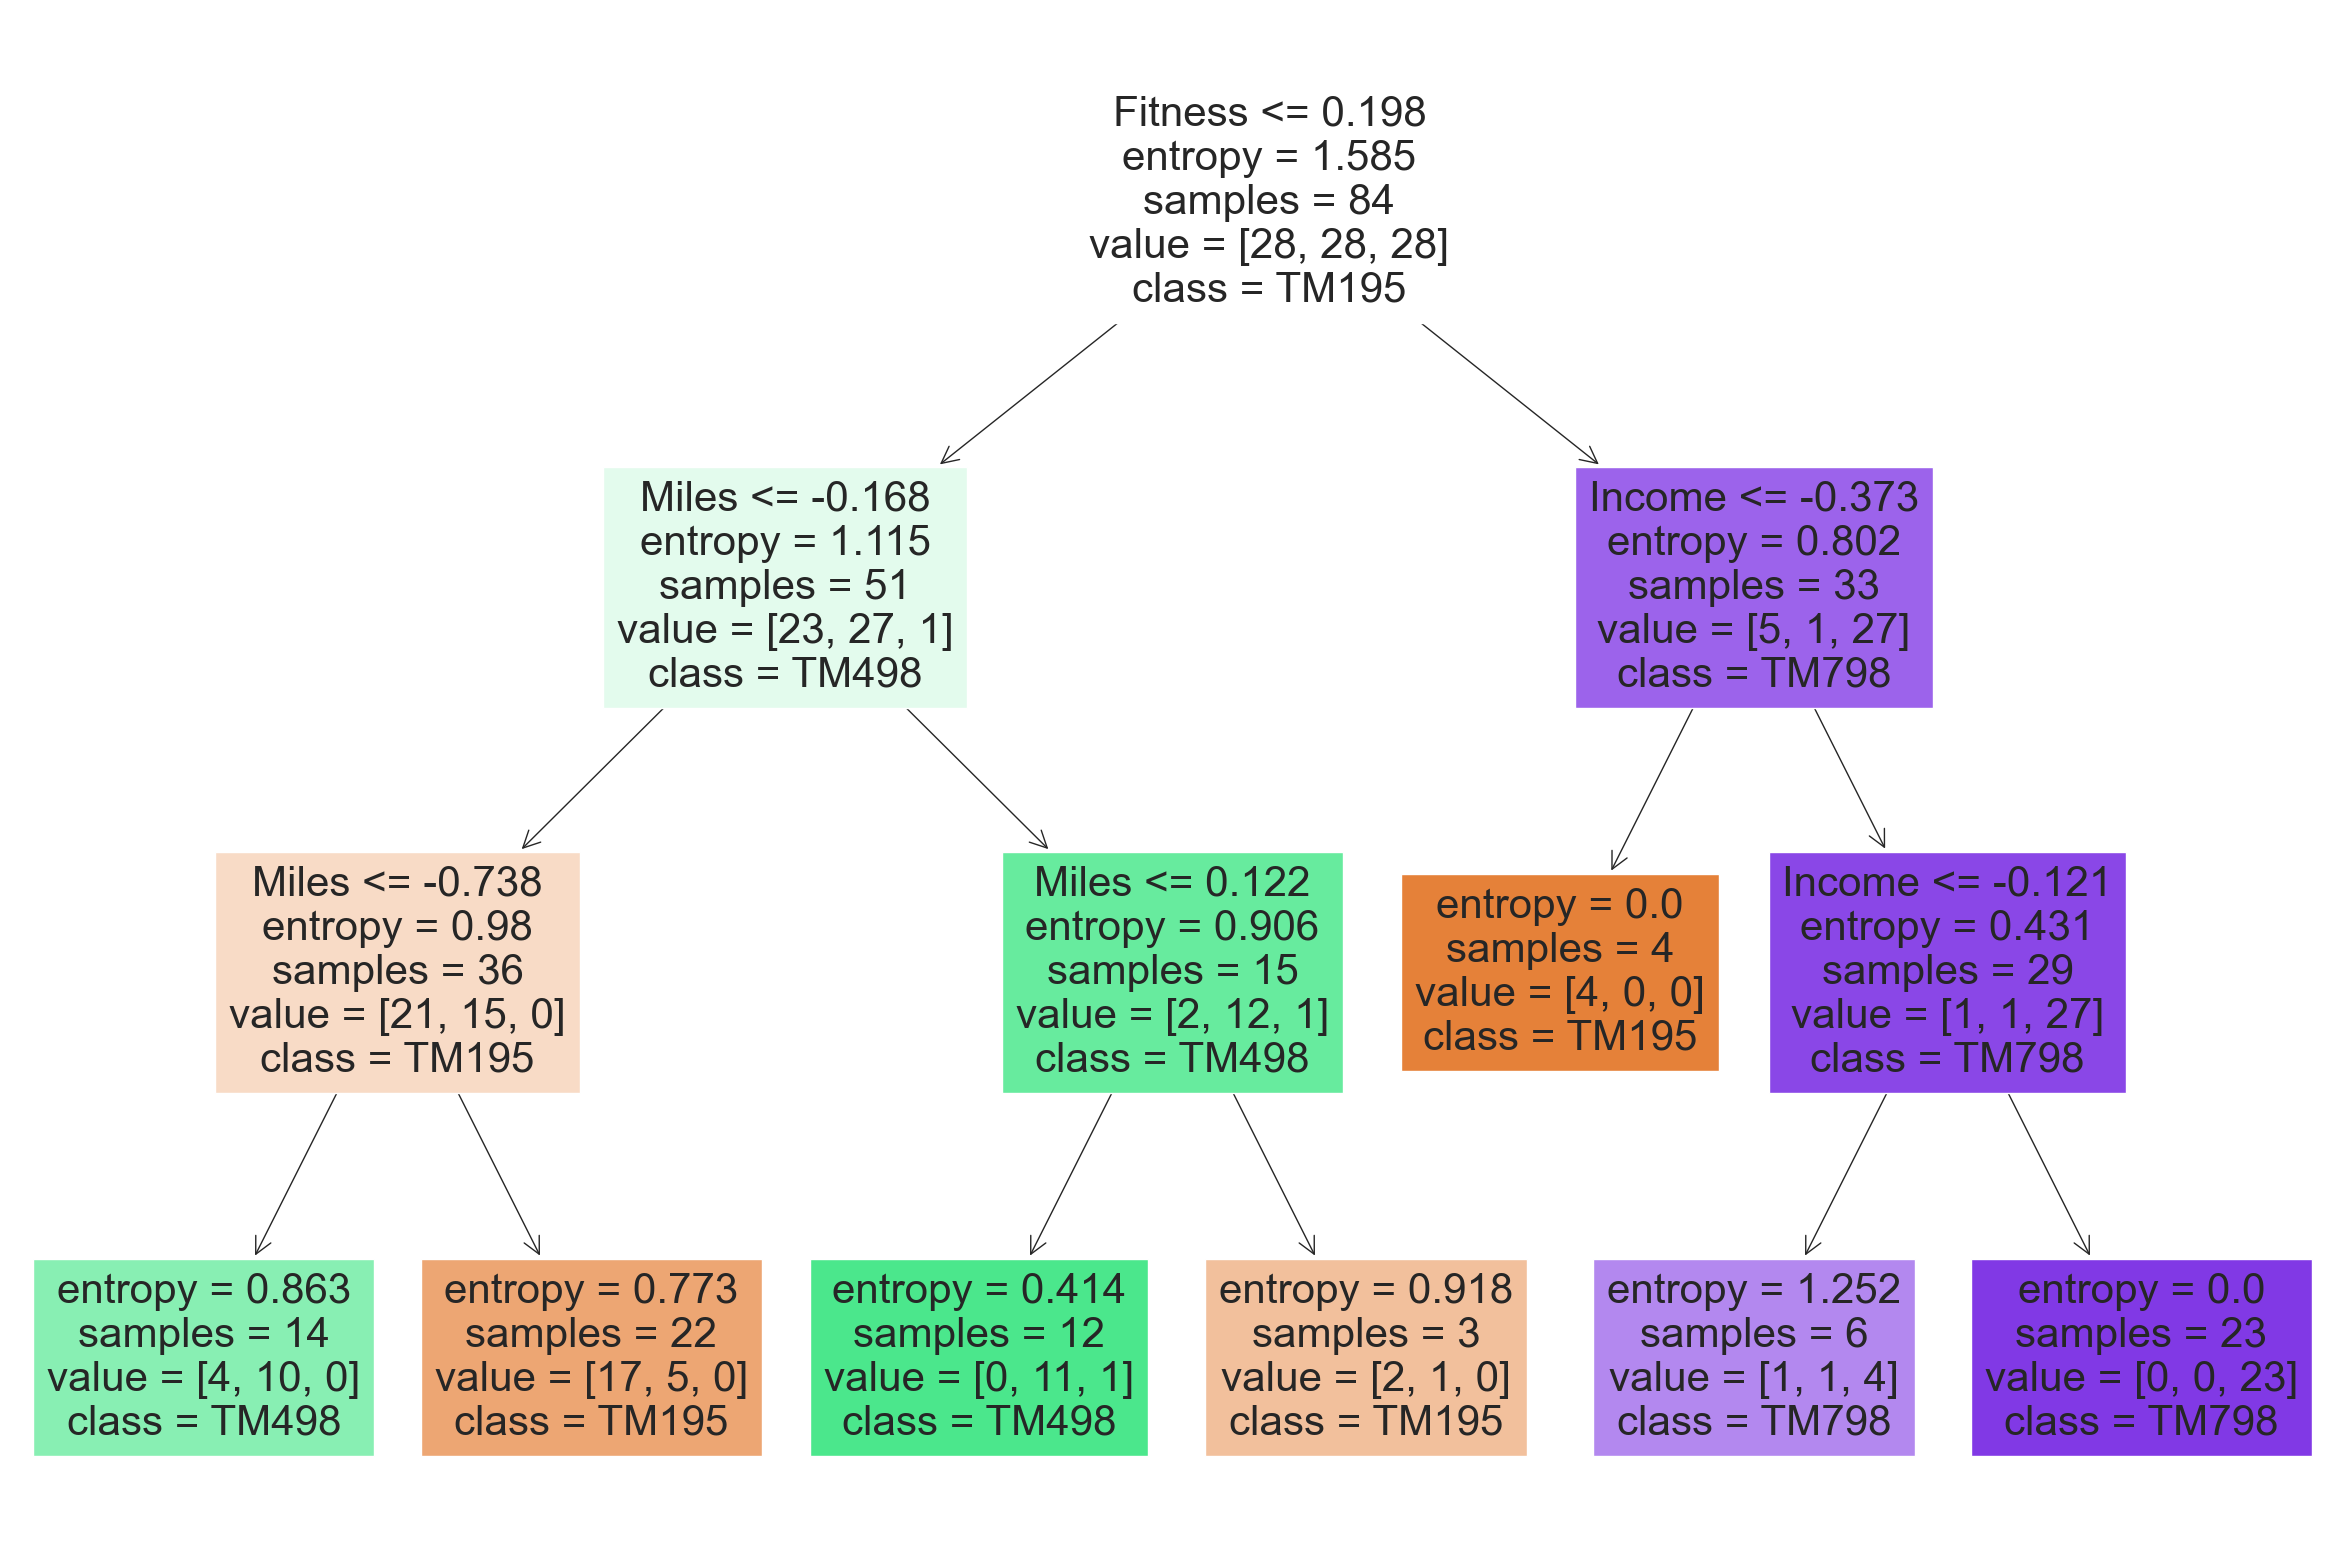

In [77]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(dtc, filled=True, feature_names=cardio_df.columns,
          class_names=['TM195', 'TM498', 'TM798'])
plt.show()


### KNN

In [92]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3, weights= 'uniform', algorithm='auto', p= 1)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print the accuracy score
print('Training Accuracy: ', knn.score(X_train, y_train))
print('Accuracy: ', knn.score(X_test, y_test))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
print('Cross Validation Score: ', cross_val_score(knn, X_train, y_train, cv=5).mean())


Training Accuracy:  0.8452380952380952
Accuracy:  0.5277777777777778
              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.42      0.42      0.42        12
           2       0.90      0.75      0.82        12

    accuracy                           0.53        36
   macro avg       0.56      0.53      0.54        36
weighted avg       0.56      0.53      0.54        36

Cross Validation Score:  0.7014705882352941


In [89]:
#hyperparameter tuning for KNN
from sklearn.model_selection import GridSearchCV

# define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': list(range(1, 10)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3, 4, 5],
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5,)
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.7147058823529412


### Logistic Regression

In [28]:
#logistic regression
logreg = LogisticRegression(random_state=42, multi_class='multinomial', C= 0, solver='newton-cg', penalty='none', )

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Print the accuracy score
print('Training Accuracy: ', logreg.score(X_train, y_train))
print('Accuracy: ', logreg.score(X_test, y_test))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
print('Cross Validation Score: ', cross_val_score(logreg, X_train, y_train, cv=5).mean())


Training Accuracy:  0.7857142857142857
Accuracy:  0.75
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.62      0.67      0.64        12
           2       0.92      1.00      0.96        12

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36

Cross Validation Score:  0.7382352941176471


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

In [25]:
#Grid search for logistic regression
param_grid = {
    'C': [0, 0.01, 0.1, 0,5, 1, 5, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state': [42],
    'multi_class': ['multinomial'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100, 200, 300],
    }

# Create a logistic regression classifier
logreg = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5,)
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to 

Best parameters:  {'C': 0, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'none', 'random_state': 42, 'solver': 'newton-cg'}
Best cross-validation score: 0.7382352941176471


c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\magsa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

### SVM

In [86]:
#Create SVM model
svm = SVC(C=10, kernel='rbf', gamma=0.1, decision_function_shape='ovo', degree=1, random_state=42)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Print the accuracy score
print('Training Accuracy: ', svm.score(X_train, y_train))
print('Accuracy: ', svm.score(X_test, y_test))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the cross-validation scores
print('Cross Validation Score: ', cross_val_score(svm, X_train, y_train, cv=5).mean())


Training Accuracy:  0.8571428571428571
Accuracy:  0.6388888888888888
              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.50      0.58      0.54        12
           2       0.92      0.92      0.92        12

    accuracy                           0.64        36
   macro avg       0.64      0.64      0.64        36
weighted avg       0.64      0.64      0.64        36

Cross Validation Score:  0.75


In [84]:
#Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'random_state': [42],
    }

# Create a SVM classifier
svm = SVC()

# Create a grid search object
grid_search = GridSearchCV(svm, param_grid, cv=5,)
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters:  {'C': 10, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}
Best cross-validation score: 0.75
